In [ ]:
import numpy as np
import collections
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def dist(x1,x2):
    distance =  np.sqrt(np.sum(x1-x2)**2) # euclid distance of points ,
    return distance             #other distance functions can be used for different scenarios



class KNN:
    def __init__(self,k=10): #k determined later
        self.k=k

    def fitting(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def prediction(self, X):
        predicts = [self.calculate(x) for x in X] # Call calculate with self
        return predicts

    def calculate(self, x): # Define calculate as a method within the KNN class
        distances = [dist(x, x_train) for x_train in self.X_train] #loops over each val in train set
        #calculates distances and gets closest k

        k_indices =  np.argsort(distances)[:self.k] #gets indices of closest k
        k_nearest_labels = [self.Y_train[i] for i in k_indices]

        most = collections.Counter(k_nearest_labels).most_common()
        return most[0][0]






In [ ]:
iris = datasets.load_iris()
X, Y = iris.data, iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1234)

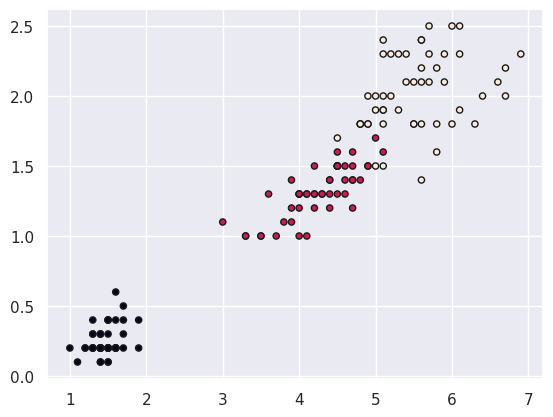

In [ ]:
plt.figure()
plt.scatter(X[:, 2], X[:, 3], c=Y, edgecolor='k', s=20)
plt.show()






In [ ]:
clf = KNN(k=10)
clf.fitting(X_train, Y_train)
results = clf.prediction(X=X_test)

print(results)

[1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 2]


In [ ]:
#count predictions if same as y test and divide by total

def percentage(res):
   return(np.sum(res == Y_test)/ len(Y_test))
print(percentage(results))

#plot percentage whilst varying k to see how it improves.

0.9565217391304348


28


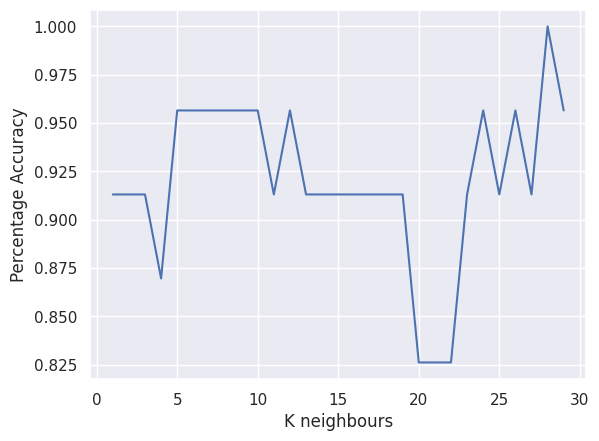

In [ ]:
xvals = np.arange(1,30,1) # k vals
yvals = []
for i in xvals:
  clf = KNN(k=i)
  clf.fitting(X_train, Y_train)
  results = clf.prediction(X=X_test)
  yvals.append(percentage(results))

plt.plot(xvals, yvals)
plt.xlabel('K neighbours')
plt.ylabel('Percentage Accuracy')

print(np.argmax(yvals) + 1)
 # best k value for performance, add one since k=1 at position 0


In [ ]:
clf = KNN(k=28)
clf.fitting(X_train, Y_train)
results = clf.prediction(X=X_test)
print(percentage(results)) # check 28 was correct

1.0
